# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

pharma = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

pharma

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mouse_count = len(pharma["Mouse ID"].unique())
mouse_count

249

In [3]:
dupe_id = pharma.loc[pharma.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dupe_id

array(['g989'], dtype=object)

In [10]:
clean_pharma = pharma[pharma['Mouse ID'].isin(dupe_id)==False]
clean_pharma


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [56]:
mouse = len(clean_pharma["Mouse ID"].unique())
mouse

248

## Summary Statistics

In [67]:
group_median = clean_pharma.groupby(["Drug Regimen"]).median()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_22988\1403318107.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_median = clean_pharma.groupby(["Drug Regimen"]).median()


In [69]:
group_mean = clean_pharma.groupby(["Drug Regimen"]).mean()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_22988\1127000854.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_mean = clean_pharma.groupby(["Drug Regimen"]).mean()


In [61]:
group_var = clean_pharma.groupby(["Drug Regimen"]).var()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_22988\3466896755.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_var = clean_pharma.groupby(["Drug Regimen"]).var()


In [62]:
group_std = clean_pharma.groupby(["Drug Regimen"]).std()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_22988\2061680578.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_std = clean_pharma.groupby(["Drug Regimen"]).std()


In [63]:
group_sem = clean_pharma.groupby(["Drug Regimen"]).sem()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_22988\2701993429.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_sem = clean_pharma.groupby(["Drug Regimen"]).sem()


In [74]:
sum_df = pd.DataFrame({
     "Mean Tumor Volume" : group_mean["Tumor Volume (mm3)"],
    "Median Tumor Volume": group_median["Tumor Volume (mm3)"],
   "Variance Tumor Volume": group_var["Tumor Volume (mm3)"],
    "Std Dev Tumor Volume": group_std["Tumor Volume (mm3)"],
    "Std Err. Tumor Volume": group_sem["Tumor Volume (mm3)"]
})
sum_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,Std Err. Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [81]:
sum_dd = pd.DataFrame({
     "Mean" : group_mean["Tumor Volume (mm3)"],
    "Med": group_median["Tumor Volume (mm3)"],
   "Var": group_var["Tumor Volume (mm3)"],
    "Std": group_std["Tumor Volume (mm3)"],
    "Sem": group_sem["Tumor Volume (mm3)"]
})
sum_dd

,Mean,Med,Var,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
import pandas as pd

summary_stats = clean_pharma.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
).reset_index()

summary_stats


,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Variance,Standard_Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

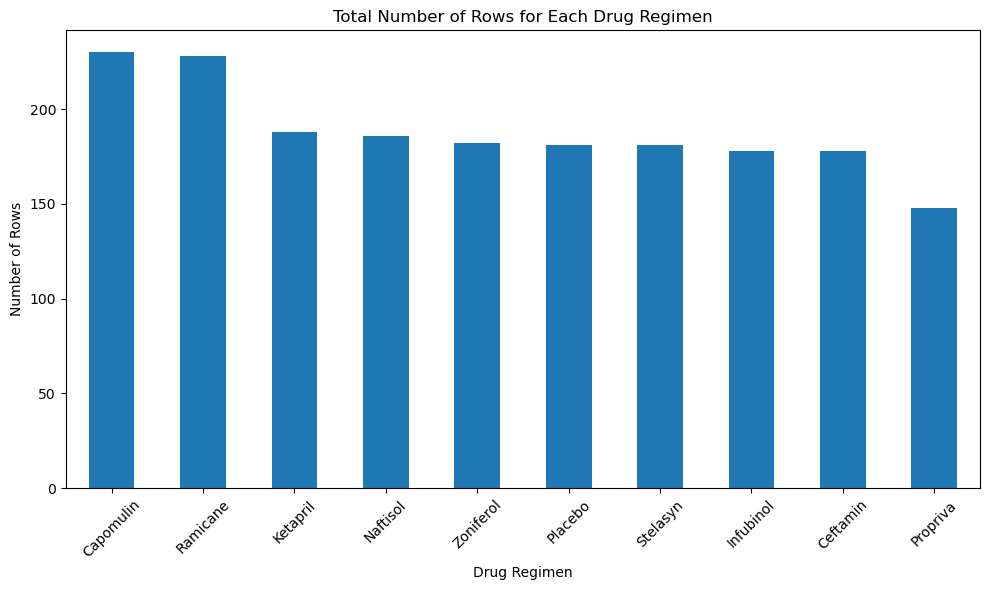

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

regimen_counts = clean_pharma['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


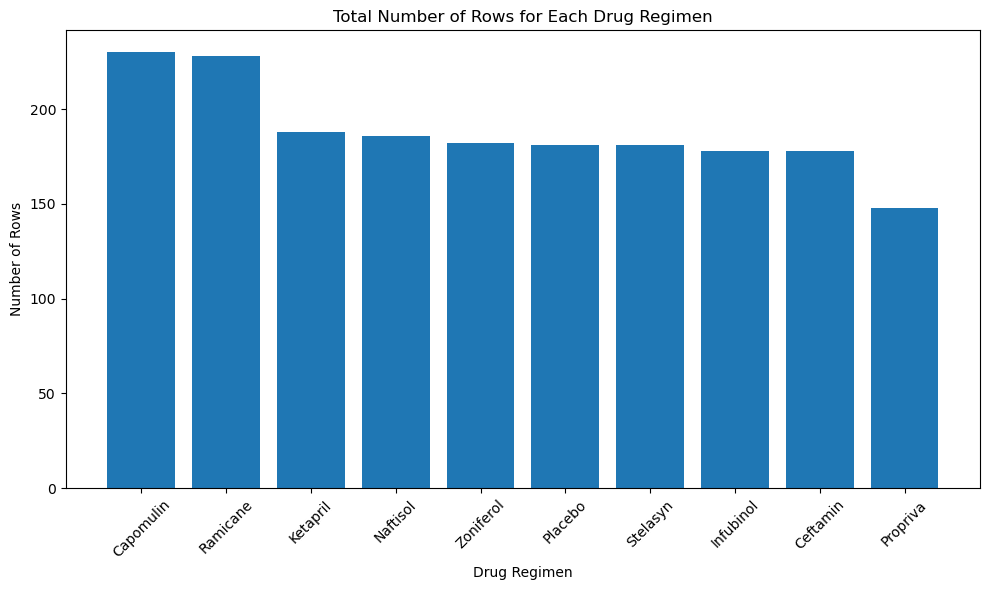

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

regimen_counts = clean_pharma['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


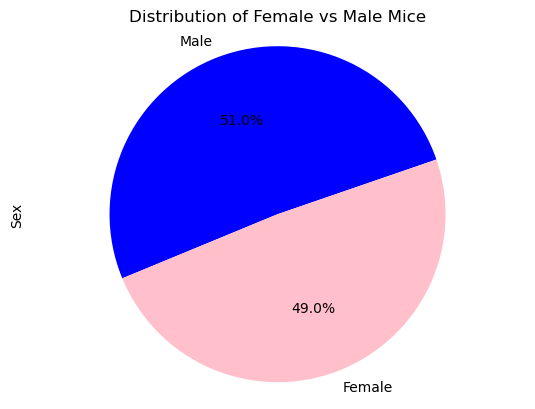

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

gender_distribution = clean_pharma['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=19, colors=['blue', 'pink'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular

plt.show()


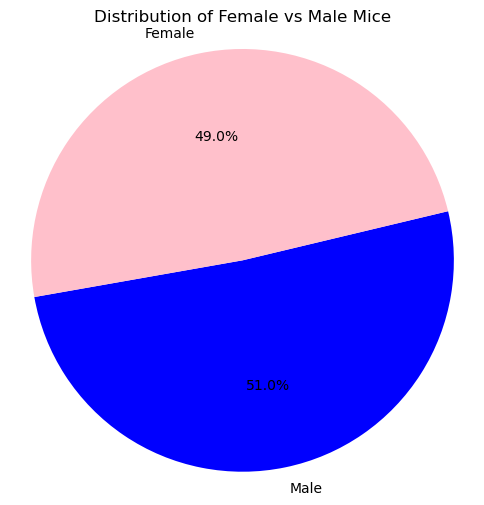

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

gender_distribution = clean_pharma['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=190,
        colors=['blue', 'pink'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal') 

plt.show()



## Quartiles, Outliers and Boxplots

In [27]:
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_data = clean_pharma[clean_pharma['Drug Regimen'].isin(treatment_regimens)]

last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

final_tumor_volume = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [28]:
# List of treatments for the for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volume_data = {}

for treatment in treatments:
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    tumor_volume_data[treatment] = tumor_volumes
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

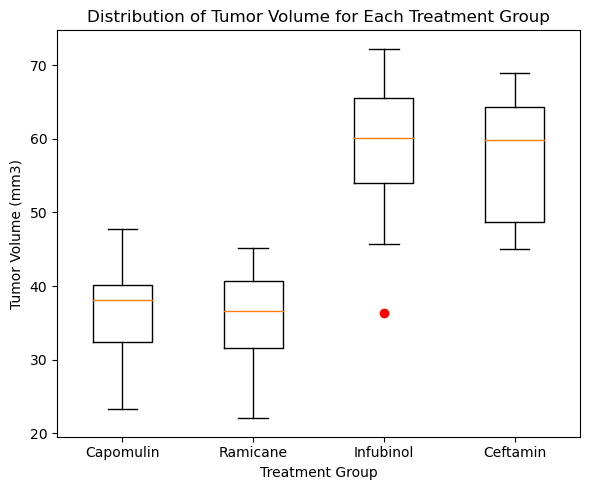

In [55]:
import matplotlib.pyplot as plt

# Create a list of tumor volume data for each treatment
data_to_plot = list(tumor_volume_data.values())

treatment_labels = list(tumor_volume_data.keys())

plt.figure(figsize=(6, 5))
plt.boxplot(data_to_plot, labels=treatment_labels, sym='ro')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=0)
plt.tight_layout()


plt.show()


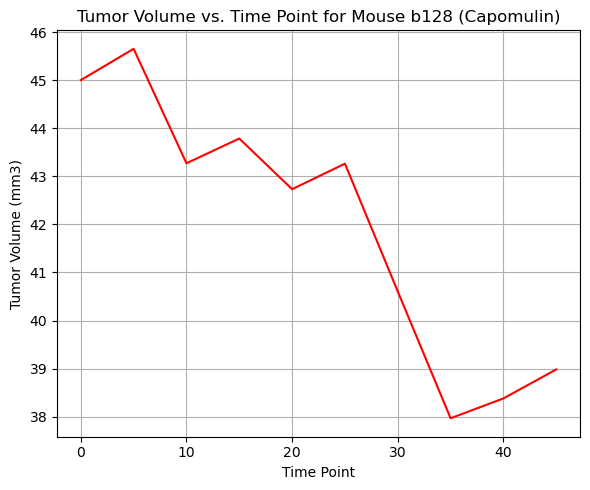

In [54]:
import matplotlib.pyplot as plt

selected_mouse = 'b128'
mouse_data = clean_pharma[(clean_pharma['Mouse ID'] == selected_mouse) & (clean_pharma['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(6, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='red')
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin)")
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()

plt.show()


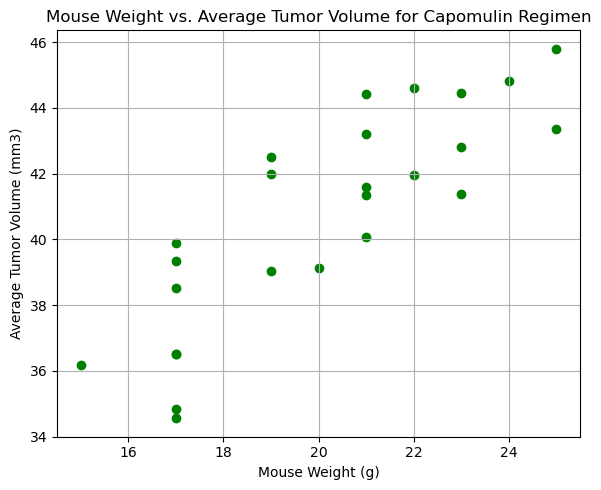

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

capomulin_data = clean_pharma[clean_pharma['Drug Regimen'] == 'Capomulin']

avg_tumor_weight = capomulin_data.groupby('Mouse ID').agg(Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'), Mouse_Weight=('Weight (g)', 'mean'))

plt.figure(figsize=(6, 5))
plt.scatter(avg_tumor_weight['Mouse_Weight'], avg_tumor_weight['Average_Tumor_Volume'], color='green')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()


plt.show()


## Correlation and Regression

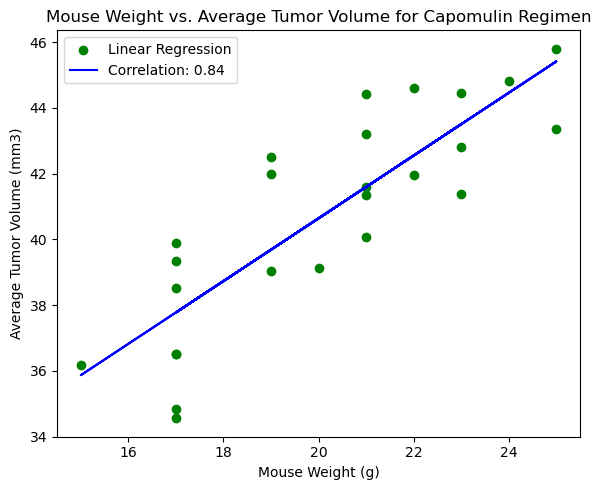

In [52]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
import scipy.stats as st

capomulin_data = clean_pharma[clean_pharma['Drug Regimen'] == 'Capomulin']

avg_tumor_weight = capomulin_data.groupby('Mouse ID').agg(Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),Mouse_Weight=('Weight (g)', 'mean'))

correlation_coefficient = st.pearsonr(avg_tumor_weight['Mouse_Weight'], avg_tumor_weight['Average_Tumor_Volume'])[0]

slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_weight['Mouse_Weight'], avg_tumor_weight['Average_Tumor_Volume'])

plt.figure(figsize=(6, 5))
plt.scatter(avg_tumor_weight['Mouse_Weight'], avg_tumor_weight['Average_Tumor_Volume'], color='green')
plt.plot(avg_tumor_weight['Mouse_Weight'], slope * avg_tumor_weight['Mouse_Weight'] + intercept, color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend(['Linear Regression', f'Correlation: {correlation_coefficient:.2f}'])
plt.tight_layout()

plt.show()
